<a href="https://colab.research.google.com/github/BillySiaga/Project2025/blob/main/DeepNeural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep Neural Networks using a Bank dataset
This ➡️ dataset contains banking marketing campaign data and we can use it to optimize marketing campaigns to attract more customers to term deposit subscription.

What is a Term Deposit?

A Term deposit is a deposit that a bank or a financial institution offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time.


Instructions
In this assignment you will have to take the following steps:

Import your dataset and perform initial analysis and visualization
Clean the data
Build a  deep learning network to predict the marketing campaign outcome ("deposit" either Yes or No)

In [16]:
#import the neccesary libraries for deep neural networks
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
#loading the training dataset
data = pd.read_csv('/content/bank.csv')
data.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [18]:
data.tail()

age          job  marital  education default  balance housing loan  \
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
11157  cellular   20   apr       257         1     -1         0  unknown   
11158   unknown   16   jun        83         4     -1         0  unknown   
11159  cellular   19   aug       156         2     -1         0  unknown   
11160  cellular    8   may         9         2    172         5  failure   
11161  cellular    9   jul       628         1     -1         0  unknown   

      deposit  
11157      no  
11158      no  
11159      no  
11160      no  
11161      no

In [19]:
#Exploratory analysis on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [20]:
data.describe()

age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  
max      854.000000     58.000000

In [21]:
#checking for null values in the dataset
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [22]:
#ydata profiling report to capture the details of the dataset
!pip install ydata-profiling

In [23]:
#generating the report
from ydata_profiling import ProfileReport
profile = ProfileReport(data, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 17/17 [00:00<00:00, 21.35it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## A Deep Learning Network for Prediction
Build a  deep learning network to predict the marketing campaign outcome ("deposit" either Yes or No)

In [24]:
#Build a  deep learning network to predict the marketing campaign outcome ("deposit" either Yes or No)
# Preprocessing the data
X = data.drop('deposit', axis=1)
y = data['deposit']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [26]:
#Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Building the Model

In [27]:
#Building the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [28]:
#compiling the model using adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
#Train the model
# Convert target variable to numerical (0 for 'no', 1 for 'yes')
y_train = y_train.replace({'yes': 1, 'no': 0})
y_test = y_test.replace({'yes': 1, 'no': 0})

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8848 - loss: 0.2824 - val_accuracy: 0.8356 - val_loss: 0.3847
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8838 - loss: 0.2824 - val_accuracy: 0.8339 - val_loss: 0.3910
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8910 - loss: 0.2673 - val_accuracy: 0.8352 - val_loss: 0.3820
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8916 - loss: 0.2653 - val_accuracy: 0.8352 - val_loss: 0.3946
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8895 - loss: 0.2641 - val_accuracy: 0.8361 - val_loss: 0.3955
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8934 - loss: 0.2653 - val_accuracy: 0.8410 - val_loss: 0.3998
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8955 - loss: 0.2514 - val_accuracy: 0.8258 - val_loss: 0.4022
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8947 - loss: 0.2539 - val_accuracy: 0.

In [34]:
#Evaluating and predicting
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')
predictions = model.predict(X_test)

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8109 - loss: 0.4555
Test Loss: 0.4150
Test Accuracy: 0.8289
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [35]:
#Analyzing the confusion matrix to check for false positives/negatives.
from sklearn.metrics import confusion_matrix
y_pred = (predictions > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[949 217]
 [165 902]]


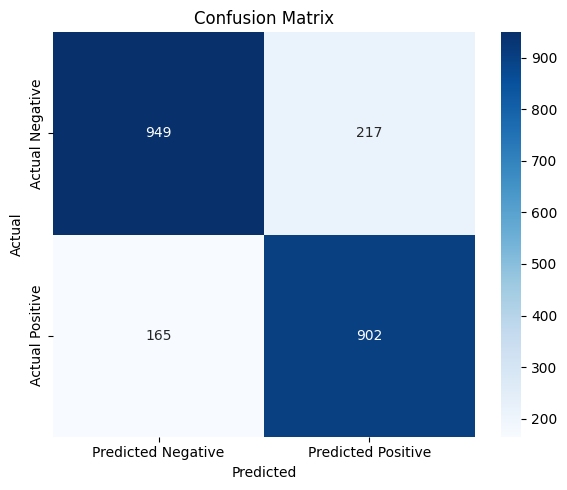

In [37]:
#Visualizing the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Your actual and predicted labels
y_true = y_test # Replace with your true labels
y_pred = (predictions > 0.5).astype(int) # Replace with your model's predicted labels

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot it
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

## Insights
the model overall performed well for the banking customers and would mostly catch most risky clients.